In [1]:
%display typeset

In [52]:
%display plain

In [3]:
f(x)=x^2

In [4]:
f(x)

x^2

In [5]:
oo

+Infinity

In [6]:
sqrt(2.)

1.41421356237310


## List of reduced variables:
**w, kx, ky, mu, mu_odd, mu_R, Gamma^w, Gamma^u, D^Omega, alpha**

(The dimensionless equations do not depend explicitly on density rho)

In [7]:
w = SR.var('w')
kx = SR.var('kx', domain = 'real')
ky = SR.var('ky', domain = 'real')

#a = SR.var('a', domain = 'positive')
#In = SR.var('In', domain = 'positive')
a = 1
In = 1
b = var('b', domain = 'positive') # active expansion parameter: delta tau = beta delta rho

Gamma_u = SR.var('Gamma_u', domain='positive')
Gamma_w = SR.var('Gamma_w', domain='positive')
D_w = SR.var('D_w', domain='real')

Re = SR.var('Re', domain = 'positive')
Re_odd = SR.var('Re_odd', domain = 'real')
Re_R = SR.var('Re_R', domain = 'real')

## COMPLETE EXPRESSION OF THE DISPERSION RELATION. Full in k terms.

In [8]:
# complete matrix
row1 = [-w*i, kx*i, ky*i, 0]
row2 = [a * kx*i, -w*i + (kx^2+ky^2)/Re + ky^2/(4*Re_R) + Gamma_u, (kx^2+ky^2)/Re_odd - kx*ky/(4*Re_R), -ky*i/(2*Re_R) ]
row3 = [a * ky*i, -(kx^2+ky^2)/Re_odd - kx*ky/(4*Re_R), -w*i + (kx^2+ky^2)/Re + kx^2/(4*Re_R) + Gamma_u , kx*i/(2*Re_R)]
row4 = [0, ky*i/(2*Re_R), -kx*i/(2*Re_R), -In*w*i + 1/Re_R + Gamma_w + (kx^2+ky^2)*D_w ]
row4_MOD = [b, ky*i/(2*Re_R), -kx*i/(2*Re_R), -In*w*i + 1/Re_R + Gamma_w + (kx^2+ky^2)*D_w ]

In [9]:
# The fourth row modified so that 
row4_MOD

[b, 1/2*I*ky/Re_R, -1/2*I*kx/Re_R, (kx^2 + ky^2)*D_w + Gamma_w - I*w + 1/Re_R]

In [10]:
# Build the complete matrix, out of movement eqs.
Dispersion_Matrix = matrix(SR, 4, 4, (row1, row2, row3, row4_MOD))
Dispersion_Matrix

[                                            -I*w                                             I*kx                                             I*ky                                                0]
[                                            I*kx Gamma_u + 1/4*ky^2/Re_R - I*w + (kx^2 + ky^2)/Re           -1/4*kx*ky/Re_R + (kx^2 + ky^2)/Re_odd                                   -1/2*I*ky/Re_R]
[                                            I*ky           -1/4*kx*ky/Re_R - (kx^2 + ky^2)/Re_odd Gamma_u + 1/4*kx^2/Re_R - I*w + (kx^2 + ky^2)/Re                                    1/2*I*kx/Re_R]
[                                               b                                    1/2*I*ky/Re_R                                   -1/2*I*kx/Re_R       (kx^2 + ky^2)*D_w + Gamma_w - I*w + 1/Re_R]

In [10]:
# Build the complete matrix, out of movement eqs.
Dispersion_Matrix = matrix(SR, 4, 4, (row1, row2, row3, row4))
Dispersion_Matrix

[                                            -I*w                                             I*kx                                             I*ky                                                0]
[                                            I*kx Gamma_u + 1/4*ky^2/Re_R - I*w + (kx^2 + ky^2)/Re           -1/4*kx*ky/Re_R + (kx^2 + ky^2)/Re_odd                                   -1/2*I*ky/Re_R]
[                                            I*ky           -1/4*kx*ky/Re_R - (kx^2 + ky^2)/Re_odd Gamma_u + 1/4*kx^2/Re_R - I*w + (kx^2 + ky^2)/Re                                    1/2*I*kx/Re_R]
[                                               0                                    1/2*I*ky/Re_R                                   -1/2*I*kx/Re_R       (kx^2 + ky^2)*D_w + Gamma_w - I*w + 1/Re_R]

In [26]:
Dispersion_Matrix.det().collect(kx).collect(ky)

1/4*kx^6*(4*D_w/Re + D_w/Re_R - 4*I*D_w*w/Re^2 - I*D_w*w/(Re*Re_R) - 4*I*D_w*w/Re_odd^2) + 1/4*ky^6*(4*D_w/Re + D_w/Re_R - 4*I*D_w*w/Re^2 - I*D_w*w/(Re*Re_R) - 4*I*D_w*w/Re_odd^2) + D_w*Gamma_u*kx^4 - I*D_w*Gamma_u^2*kx^2*w - I*D_w*kx^4*w - 2*I*D_w*Gamma_u*kx^4*w/Re - 1/4*I*D_w*Gamma_u*kx^4*w/Re_R - 2*D_w*Gamma_u*kx^2*w^2 - 2*D_w*kx^4*w^2/Re - 1/4*D_w*kx^4*w^2/Re_R + I*D_w*kx^2*w^3 + 1/4*(4*D_w*Gamma_u + 12*D_w*kx^2/Re + 3*D_w*kx^2/Re_R - 4*I*D_w*w - 8*I*D_w*Gamma_u*w/Re - I*D_w*Gamma_u*w/Re_R - 12*I*D_w*kx^2*w/Re^2 - 3*I*D_w*kx^2*w/(Re*Re_R) - 12*I*D_w*kx^2*w/Re_odd^2 - 8*D_w*w^2/Re - D_w*w^2/Re_R + 4*Gamma_w/Re + Gamma_w/Re_R - 4*I*Gamma_w*w/Re^2 - 4*I*w/Re - I*Gamma_w*w/(Re*Re_R) - I*w/Re_R - 4*I*Gamma_w*w/Re_odd^2 - 4*w^2/Re^2 - w^2/(Re*Re_R) - 4*w^2/Re_odd^2 + 4/(Re*Re_R) - 4*I*w/(Re^2*Re_R) - 4*I*w/(Re_R*Re_odd^2))*ky^4 + Gamma_u*Gamma_w*kx^2 + Gamma_w*kx^4/Re + 1/4*Gamma_w*kx^4/Re_R - I*Gamma_u^2*Gamma_w*w - I*Gamma_u*kx^2*w - I*Gamma_w*kx^2*w - 2*I*Gamma_u*Gamma_w*kx^2*w/Re - 1

### Approximation with Gamma, Gamma, Gamma_w = 0, D_w = 0

In [12]:
# simplified matrix with Gamma, Gamma, Gamma_w = 0, D_w = 0
row1_gammas = (-w*I, kx*I, ky*I, 0)
row2_gammas = (a * kx*I, -w*I + (kx^2+ky^2)/Re + ky^2/(4*Re_R) , (kx^2+ky^2)/Re_odd - kx*ky/(4*Re_R), -ky*I/(2*Re_R) )
row3_gammas = (a * ky*I, -(kx^2+ky^2)/Re_odd - kx*ky/(4*Re_R), -w*I + (kx^2+ky^2)/Re + kx^2/(4*Re_R) , kx*I/(2*Re_R) )
row4_gammas = (0, ky*I/(2*Re_R), -kx*I/(2*Re_R), -In*w*I + 1/Re_R)

In [13]:
# Build the complete matrix, out of movement eqs.
Dispersion_Matrix_gammas = matrix(SR, 4, 4, (row1_gammas, row2_gammas, row3_gammas, row4_gammas))
Dispersion_Matrix_gammas

[                                  -I*w                                   I*kx                                   I*ky                                      0]
[                                  I*kx 1/4*ky^2/Re_R - I*w + (kx^2 + ky^2)/Re -1/4*kx*ky/Re_R + (kx^2 + ky^2)/Re_odd                         -1/2*I*ky/Re_R]
[                                  I*ky -1/4*kx*ky/Re_R - (kx^2 + ky^2)/Re_odd 1/4*kx^2/Re_R - I*w + (kx^2 + ky^2)/Re                          1/2*I*kx/Re_R]
[                                     0                          1/2*I*ky/Re_R                         -1/2*I*kx/Re_R                          -I*w + 1/Re_R]

### Approximation with large rotational viscosity ($1/\mathrm{Re_R}=0$)

In [14]:
# simplified matrix wirh 1/Re_R=0
row1_rer = (-w*I, kx*I, ky*I, 0)
row2_rer = (a * kx*I, -w*I + (kx^2+ky^2)/Re , (kx^2+ky^2)/Re_odd , 0 )
row3_rer = (a * ky*I, -(kx^2+ky^2)/Re_odd , -w*I + (kx^2+ky^2)/Re  , 0 )
row4_rer = (0, 0,0 , -In*w*I )

In [15]:
# Build the complete matrix, out of movement eqs.
Dispersion_Matrix_rer = matrix(SR, 4, 4, (row1_rer, row2_rer, row3_rer, row4_rer))
Dispersion_Matrix_rer

[                   -I*w                    I*kx                    I*ky                       0]
[                   I*kx -I*w + (kx^2 + ky^2)/Re    (kx^2 + ky^2)/Re_odd                       0]
[                   I*ky   -(kx^2 + ky^2)/Re_odd -I*w + (kx^2 + ky^2)/Re                       0]
[                      0                       0                       0                    -I*w]

## LINEAR APPROXIMATION TO THE DISPERSION RELATION (in k)

In [11]:
# linear approximation (in k) of the complete matrix

row1_lin = ( row1[0].taylor((kx, 0), (ky,0), 1), row1[1].taylor((kx, 0), (ky,0), 1), row1[2].taylor((kx, 0), (ky,0), 1), 0 )
row2_lin = ( row2[0].taylor((kx, 0), (ky,0), 1), row2[1].taylor((kx, 0), (ky,0), 1), row2[2].taylor((kx, 0), (ky,0), 1),  row2[3].taylor((kx, 0), (ky,0), 1))
row3_lin = ( row3[0].taylor((kx, 0), (ky,0), 1), row3[1].taylor((kx, 0), (ky,0), 1), row3[2].taylor((kx, 0), (ky,0), 1),  row3[3].taylor((kx, 0), (ky,0), 1))
row4_lin = ( 0, row4[1].taylor((kx, 0), (ky,0), 1), row4[2].taylor((kx, 0), (ky,0), 1), row4[3].taylor((kx, 0), (ky,0), 1))

In [12]:
# linear approximation (in k) of the complete matrix

row1_lin_short = ( row1[1].taylor((kx, 0), (ky,0), 1), row1[2].taylor((kx, 0), (ky,0), 1), 0 )
row2_lin_short = ( row2[1].taylor((kx, 0), (ky,0), 1), row2[2].taylor((kx, 0), (ky,0), 1),  row2[3].taylor((kx, 0), (ky,0), 1))
row3_lin_short = ( row3[1].taylor((kx, 0), (ky,0), 1), row3[2].taylor((kx, 0), (ky,0), 1),  row3[3].taylor((kx, 0), (ky,0), 1))


In [13]:
# Build the (linear) matrix from equations of movement
Dispersion_Matrix_lin_short = matrix(SR, 3, 3, (row1_lin_short, row2_lin_short, row3_lin_short))
Dispersion_Matrix_lin_short

[          I*kx           I*ky              0]
[ Gamma_u - I*w              0 -1/2*I*ky/Re_R]
[             0  Gamma_u - I*w  1/2*I*kx/Re_R]

In [14]:
Dispersion_Matrix_lin_short.det()

0

In [15]:
row4_lin

(0, 1/2*I*ky/Re_R, -1/2*I*kx/Re_R, (Gamma_w*Re_R - I*Re_R*w + 1)/Re_R)

In [16]:
# Build the (linear) matrix from equations of movement
Dispersion_Matrix_lin = matrix(SR, 4, 4, (row1_lin, row2_lin, row3_lin, row4_lin))
Dispersion_Matrix_lin

[                              -I*w                               I*kx                               I*ky                                  0]
[                              I*kx                      Gamma_u - I*w                                  0                     -1/2*I*ky/Re_R]
[                              I*ky                                  0                      Gamma_u - I*w                      1/2*I*kx/Re_R]
[                                 0                      1/2*I*ky/Re_R                     -1/2*I*kx/Re_R (Gamma_w*Re_R - I*Re_R*w + 1)/Re_R]

In [18]:
det_lin = Dispersion_Matrix_lin.det().collect(w)
det_lin

Gamma_u*Gamma_w*kx^2 + Gamma_u*Gamma_w*ky^2 + (2*I*Gamma_u + I*Gamma_w + I/Re_R)*w^3 + w^4 - 1/4*(4*Gamma_u^2 + 8*Gamma_u*Gamma_w + 4*kx^2 + 4*ky^2 + 8*Gamma_u/Re_R - kx^2/Re_R^2 - ky^2/Re_R^2)*w^2 + Gamma_u*kx^2/Re_R - 1/4*kx^4/Re_R^2 + Gamma_u*ky^2/Re_R - 1/2*kx^2*ky^2/Re_R^2 - 1/4*ky^4/Re_R^2 - 1/4*(4*I*Gamma_u^2*Gamma_w + 4*I*Gamma_u*kx^2 + 4*I*Gamma_w*kx^2 + 4*I*Gamma_u*ky^2 + 4*I*Gamma_w*ky^2 + 4*I*Gamma_u^2/Re_R - I*Gamma_u*kx^2/Re_R^2 + 4*I*kx^2/Re_R - I*Gamma_u*ky^2/Re_R^2 + 4*I*ky^2/Re_R)*w

In [19]:
det_lin2 = taylor(Dispersion_Matrix_lin.det(),(kx,0),(ky,0), 2).collect(w)
det_lin2

Gamma_u*Gamma_w*kx^2 + Gamma_u*Gamma_w*ky^2 + (2*I*Gamma_u + I*Gamma_w + I/Re_R)*w^3 + w^4 - 1/4*(4*Gamma_u^2 + 8*Gamma_u*Gamma_w + 4*kx^2 + 4*ky^2 + 8*Gamma_u/Re_R - kx^2/Re_R^2 - ky^2/Re_R^2)*w^2 + Gamma_u*kx^2/Re_R + Gamma_u*ky^2/Re_R - 1/4*(4*I*Gamma_u^2*Gamma_w + 4*I*Gamma_u*kx^2 + 4*I*Gamma_w*kx^2 + 4*I*Gamma_u*ky^2 + 4*I*Gamma_w*ky^2 + 4*I*Gamma_u^2/Re_R - I*Gamma_u*kx^2/Re_R^2 + 4*I*kx^2/Re_R - I*Gamma_u*ky^2/Re_R^2 + 4*I*ky^2/Re_R)*w

In [20]:
k = SR.var('k')

det_lin2_k(Gamma_u, Gamma_w, Re_R) = Gamma_u*Gamma_w*k^2 + I*((2*Gamma_u + Gamma_w) + 1/Re_R)*w^3 + w^4 - (Gamma_u^2 + 2*Gamma_u*Gamma_w + k^2 + 2*Gamma_u/Re_R - k^2/(4*Re_R^2))*w^2 + Gamma_u*k^2/Re_R - (I*Gamma_u^2*Gamma_w + I*(Gamma_u + Gamma_w)*k^2 + I*Gamma_u^2/Re_R - I*Gamma_u*k^2/(4*Re_R^2) + I*k^2/Re_R)*w
det_lin2_k(Gamma_u, Gamma_w, Re_R)

Gamma_u*Gamma_w*k^2 + (2*I*Gamma_u + I*Gamma_w + I/Re_R)*w^3 + w^4 - 1/4*(4*Gamma_u^2 + 8*Gamma_u*Gamma_w + 4*k^2 + 8*Gamma_u/Re_R - k^2/Re_R^2)*w^2 + Gamma_u*k^2/Re_R + 1/4*(-4*I*Gamma_u^2*Gamma_w - 4*(I*Gamma_u + I*Gamma_w)*k^2 - 4*I*Gamma_u^2/Re_R + I*Gamma_u*k^2/Re_R^2 - 4*I*k^2/Re_R)*w

### ADDITIONAL TORQUE TERM

In [68]:
row4_MOD_lin = ( b , row4[1].taylor((kx, 0), (ky,0), 1), row4[2].taylor((kx, 0), (ky,0), 1), row4[3].taylor((kx, 0), (ky,0), 1))

In [69]:
row4_MOD_lin

(b, 1/2*I*ky/Re_R, -1/2*I*kx/Re_R, (Gamma_w*Re_R - I*Re_R*w + 1)/Re_R)

In [70]:
# Build the (linear) matrix from equations of movement
Dispersion_Matrix_MOD_lin = matrix(SR, 4, 4, (row1_lin, row2_lin, row3_lin, row4_MOD_lin))
Dispersion_Matrix_MOD_lin

[                              -I*w                               I*kx                               I*ky                                  0]
[                              I*kx                      Gamma_u - I*w                                  0                     -1/2*I*ky/Re_R]
[                              I*ky                                  0                      Gamma_u - I*w                      1/2*I*kx/Re_R]
[                                 b                      1/2*I*ky/Re_R                     -1/2*I*kx/Re_R (Gamma_w*Re_R - I*Re_R*w + 1)/Re_R]

In [63]:
det_MOD_lin2 = taylor(Dispersion_Matrix_MOD_lin.det(),(kx,0),(ky,0), 2).collect(w)
det_MOD_lin2

Gamma_u*Gamma_w*kx^2 + Gamma_u*Gamma_w*ky^2 + (2*I*Gamma_u + I*Gamma_w + I/Re_R)*w^3 + w^4 - 1/4*(4*Gamma_u^2 + 8*Gamma_u*Gamma_w + 4*kx^2 + 4*ky^2 + 8*Gamma_u/Re_R - kx^2/Re_R^2 - ky^2/Re_R^2)*w^2 + Gamma_u*kx^2/Re_R + Gamma_u*ky^2/Re_R - 1/4*(4*I*Gamma_u^2*Gamma_w + 4*I*Gamma_u*kx^2 + 4*I*Gamma_w*kx^2 + 4*I*Gamma_u*ky^2 + 4*I*Gamma_w*ky^2 + 4*I*Gamma_u^2/Re_R - I*Gamma_u*kx^2/Re_R^2 + 4*I*kx^2/Re_R - I*Gamma_u*ky^2/Re_R^2 + 4*I*ky^2/Re_R)*w

In [59]:
b

b

### CALCULATIONS

In [21]:
det_lin2_k(Gamma_u, 0, 1e10)

(2*I*Gamma_u + 1.00000000000000e-10*I)*w^3 + w^4 + (1.00000000000000e-10)*Gamma_u*k^2 - 1/4*(4*Gamma_u^2 + 4.00000000000000*k^2 + (8.00000000000000e-10)*Gamma_u)*w^2 + 1/4*(-4.00000000000000*I*Gamma_u*k^2 - (4.00000000000000e-10*I)*Gamma_u^2 - (4.00000000000000e-10*I)*k^2)*w

In [22]:
det_lin3_k(Gamma_u, Gamma_w, Re_R) = - (2*Gamma_u*Re_R - k^2/(4))*w^2 + Gamma_u*k^2*Re_R - ( I*Gamma_u^2*Re_R - I*Gamma_u*k^2/(4) + I*k^2*Re_R)*w
det_lin3_k(Gamma_u, Gamma_w, Re_R)

Gamma_u*Re_R*k^2 - 1/4*(8*Gamma_u*Re_R - k^2)*w^2 + 1/4*(-4*I*Gamma_u^2*Re_R + I*Gamma_u*k^2 - 4*I*Re_R*k^2)*w

In [40]:
Gamma_u = 20
Gamma_w = 20
Re_R = 0.1
dispersion_eq_lin2_k = det_lin2_k(Gamma_u, Gamma_w, Re_R) == 0
solution(k) = solve(dispersion_eq_lin2_k, w)

In [27]:
f(k)=solution(k)[0].rhs().imag()

In [38]:
len(solution(k))

4

verbose 0 (3838: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 162 points.
verbose 0 (3838: plot.py, generate_plot_points) Last error message: 'math domain error'


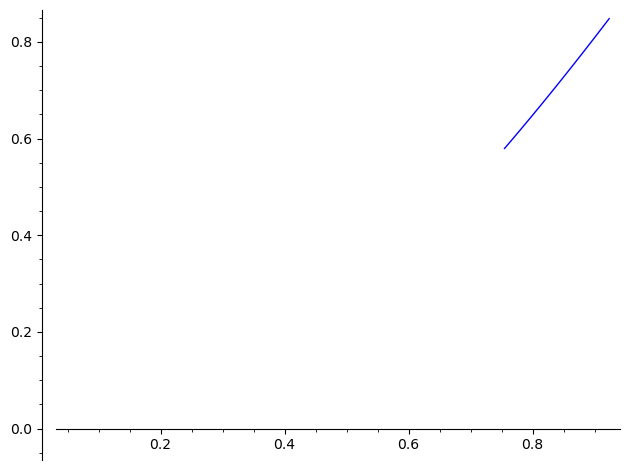

In [28]:
plot(f(k),k,0,1)

In [29]:

XY = [[] for i in range(16)]

wk(k) = [k for i in range(16)]

In [41]:
kinit = 12
for i in range(len(solution)):
    wk[i + kinit] = solution(k)[i].rhs()

In [61]:
Gamma_u = 1
Gamma_w = 1
Re_R = 1e-4

dispersion_eq_lin3_k = det_lin3_k(Gamma_u, Gamma_w, Re_R) == 0
solution(k) = solve(dispersion_eq_lin3_k, w)

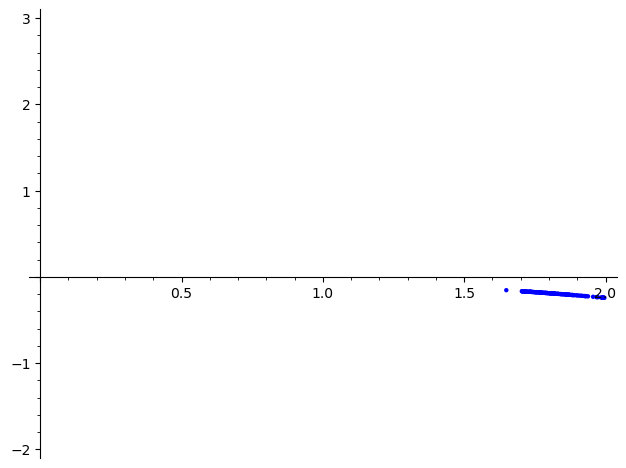

In [91]:
nk = 2000
dk = 0.001
XY[0] = [ [dk*i, n(solution(i*dk)[0].rhs().imag())] for i in range(1,nk)]
G0 = list_plot(XY[0],ymin=-2,ymax=3)
G0.show()

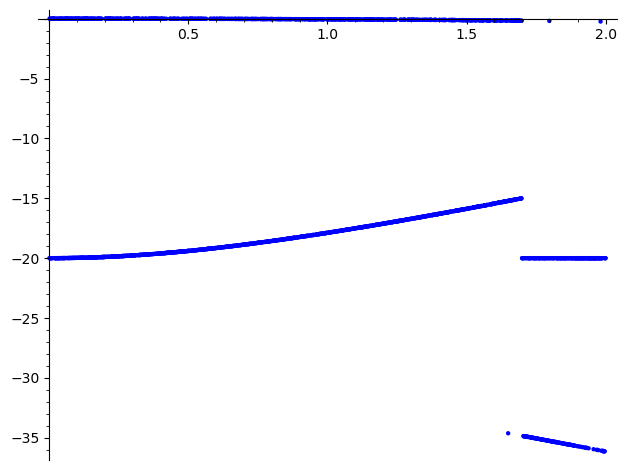

In [92]:
nk = 2000
dk = 0.001
XY[1] = [ [dk*i, n(solution(i*dk)[1].rhs().imag())] for i in range(1,nk)]
G1 = list_plot(XY[1])
G1.show()

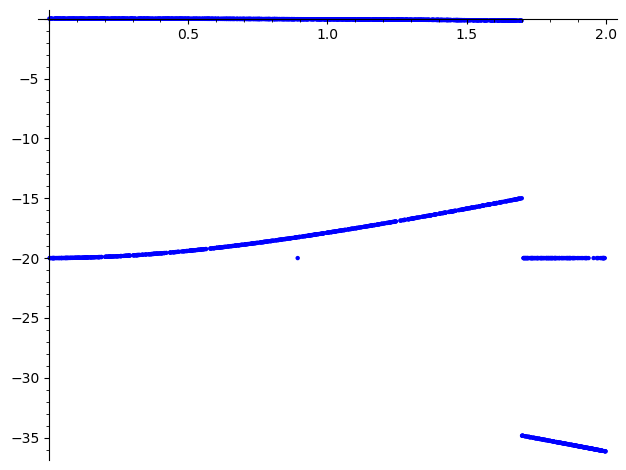

In [93]:
nk = 2000
dk = 0.001
XY[2] = [ [dk*i, n(solution(i*dk)[2].rhs().imag())] for i in range(1,nk)]
G0 = list_plot(XY[2])
G0.show()

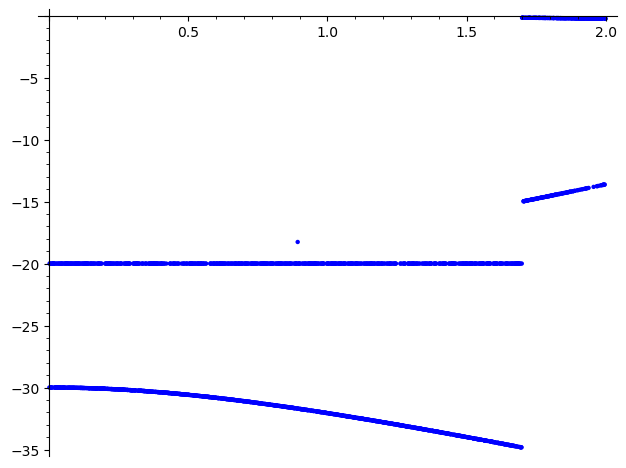

In [94]:
nk = 2000
dk = 0.001
XY[3] = [ [dk*i, n(solution(i*dk)[3].rhs().imag())] for i in range(1,nk)]
G0 = list_plot(XY[3])
G0.show()

In [95]:
GT = sum(list_plot(XY[i], size=2) for i in range(4)) 

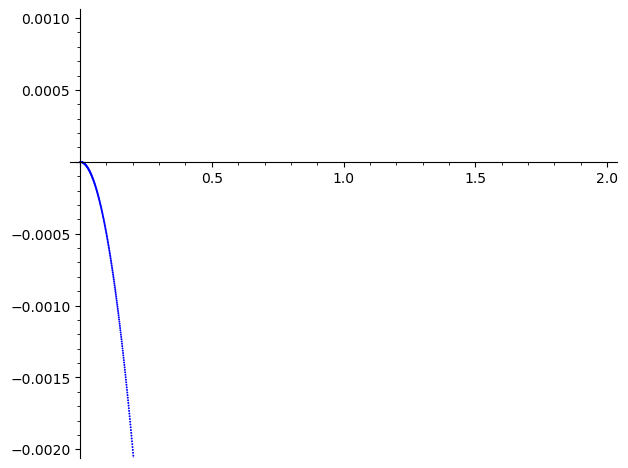

In [101]:
GT.show(ymin=-0.002,ymax=0.001)

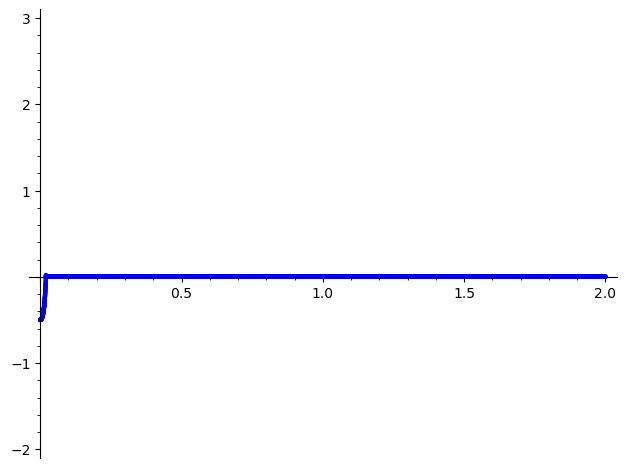

In [64]:
nk = 20000
dk = 0.0001
XY[21] = [ [dk*i, n(solution(i*dk)[1].rhs().imag())] for i in range(1,nk)]
G0 = list_plot(XY[21],ymin=-2,ymax=3)
G0.show()

In [ ]:
G0 = list_plot(XY[20],ymin=-2,ymax=3)

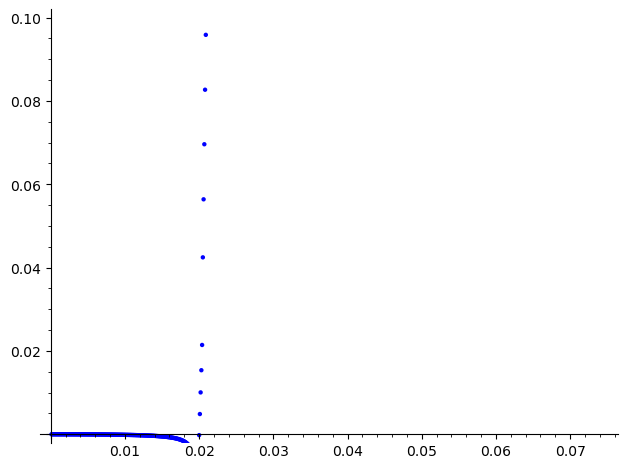

In [40]:
G0.show(xmin=0,xmax=0.075,ymax=0.1,ymin=0)

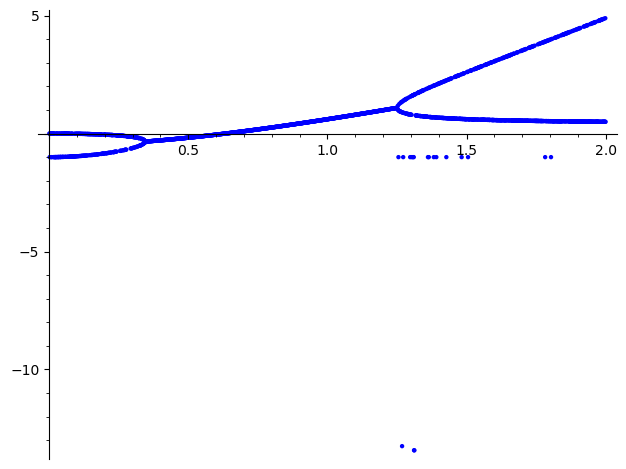

In [116]:
list_plot(XY[12])

In [123]:
sorted(colormaps)[25]

'RdYlBu'

In [127]:
cmap

NameError: name 'cmap' is not defined

In [126]:
import numpy as np

np.linspace(0,1,20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [129]:
import matplotlib.pyplot as plt
colors = plt.cm.jet(np.linspace(0,1,20))

In [131]:
colors[0]

array([0. , 0. , 0.5, 1. ])

In [94]:
XY[0] = XY[0] = [ [dk*i, n(solution(i*dk)[0].rhs().imag())] for i in range(1,nk)]

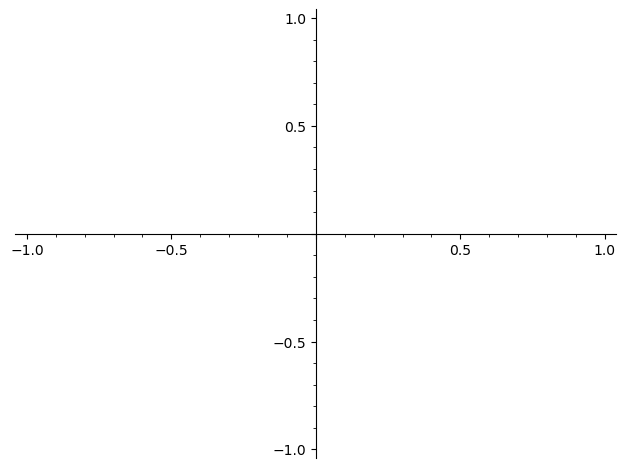

In [132]:
list_plot(XY[0], color=colors[0])

In [150]:
XY[15] = [ [dk*i, n(wk(i*dk)[15].imag())] for i in range(1,nk)]

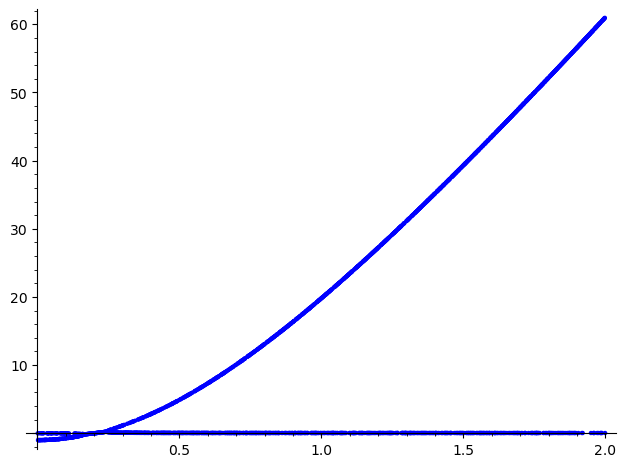

In [151]:
list_plot(XY[15])

In [68]:
wk(0.0001)[20].imag()

-1.00002500922419e-8

In [42]:
dk = 0.001
nk = 2000

for j in range(16):
    XY[j] = [ [dk*i, n(wk(i*dk)[j].imag()) ] for i in range(1,nk)]
    
#dk = 0.0001
#nk = 20000
    
#for j in range(20,22):
#    XY[j] = [ [dk*i, n(wk(i*dk)[j].imag()) ] for i in range(1,nk)]

In [60]:
color_list = ["darkorange", "darkorange", "darkorange", "darkorange", "orangered", "orangered", "orangered", "orangered", "crimson", "crimson", "crimson", "crimson", \
              "maroon", "maroon","maroon","maroon"]
legend_list = [ r"$\Gamma=0.1$",None,None,None, r"$\Gamma=1$",None, None,None, r"$\Gamma=10$",None,None,None, r"$\Gamma\to\,\infty$",None,None,None]
G = sum(list_plot(i, size=2, color=color_list[k], legend_label=legend_list[k]) for k, i in enumerate(XY))
G.set_legend_options(loc=4,numpoints=100,markerscale=5)



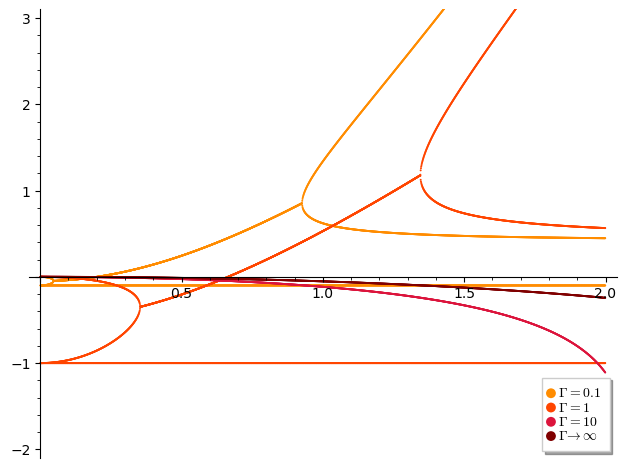

In [61]:
G.show(ymin=-2,ymax=3)

In [62]:
G.save("fig.pdf",frame=True, axes_labels=[r'$k$', r'$\mathrm{Im}(\omega)$'], fontsize=14, ymin=-2, xmin=0.04, ymax=3)

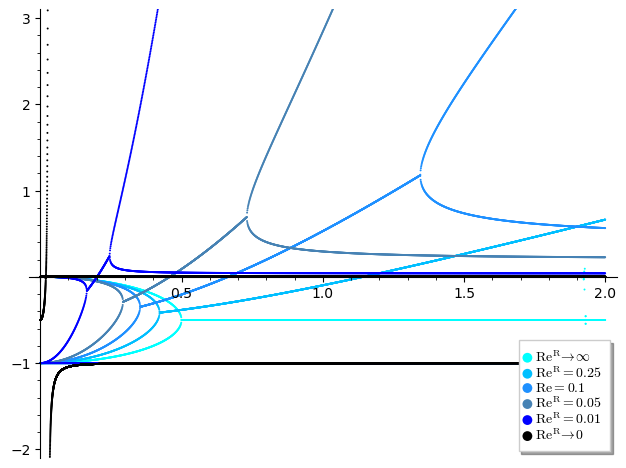

In [71]:
color_list = ["cyan", "cyan", "cyan", "cyan", "deepskyblue", "deepskyblue","deepskyblue","deepskyblue","dodgerblue","dodgerblue","dodgerblue","dodgerblue", \
              "steelblue", "steelblue","steelblue","steelblue", "blue", "blue", "blue", "blue","black", "black"]
legend_list = [r"$\mathrm{Re^R}\to\,\infty$",None,None,None, r"$\mathrm{Re^R}=0.25$",None,None,None, r"$\mathrm{Re}=0.1$",None, None,None, \
               r"$\mathrm{Re^R}=0.05$",None,None,None,r'$\mathrm{Re^R}=0.01$',None,None,None,r"$\mathrm{Re^R}\to\,0$",None]
G = sum(list_plot(i, size=2, color=color_list[k], legend_label=legend_list[k]) for k, i in enumerate(XY))
G.set_legend_options(loc=4,numpoints=100,markerscale=5)
G.show(ymin=-2,ymax=3)

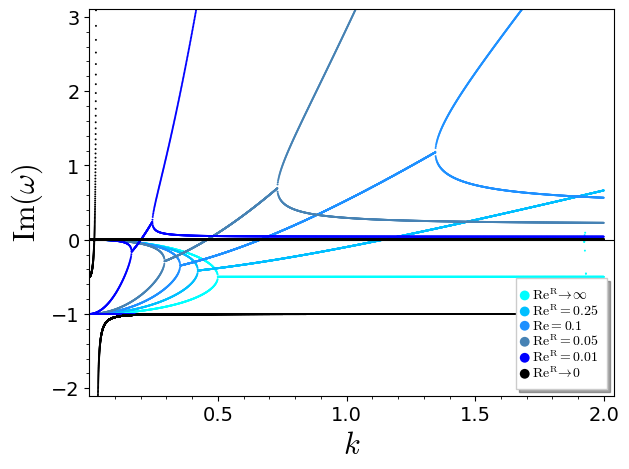

In [75]:
G.show(frame=True, axes_labels=[r'$k$', r'$\mathrm{Im}(\omega)$'], fontsize=14, ymin=-2, xmin=0.04, ymax=3)

In [76]:
G.save("fig.pdf",frame=True, axes_labels=[r'$k$', r'$\mathrm{Im}(\omega)$'], fontsize=14, ymin=-2, xmin=0.04, ymax=3)

In [ ]:
# Re_R = 0; 1e-4
G.show(ymin=-2)

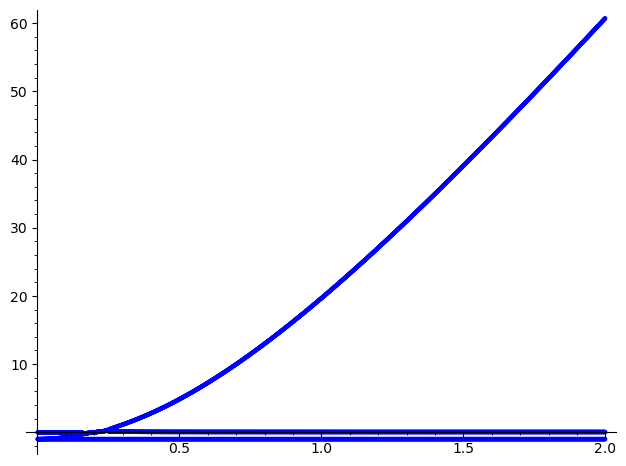

In [219]:
# Re_R = 0.01
G.show(ymin=-2)

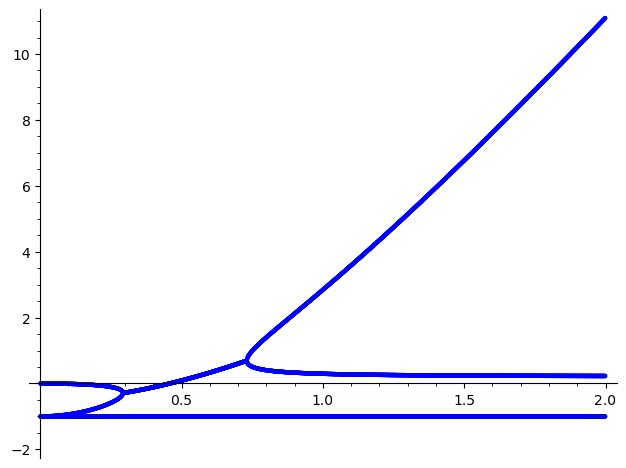

In [202]:
# Re_R = 0.05
G.show(ymin=-2)

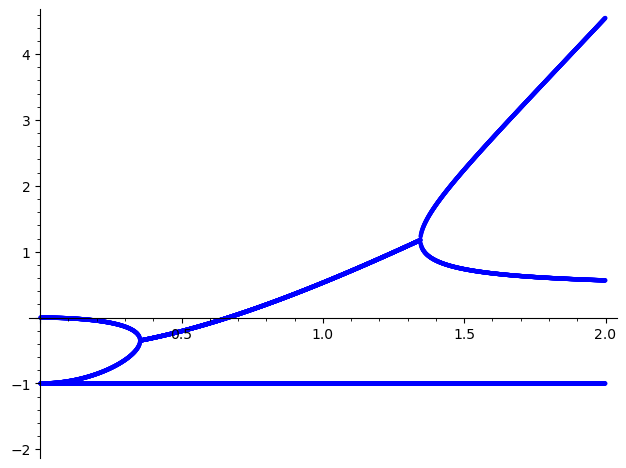

In [179]:
# Re_R =0.1
G.show(ymin=-2)

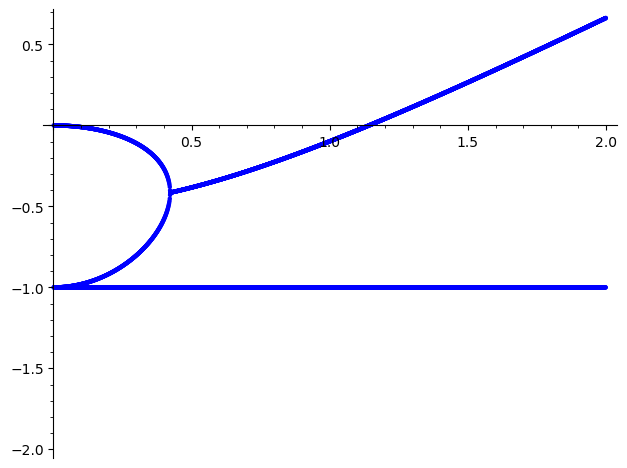

In [191]:
# Re_R=0.25
G.show(ymin=-2)

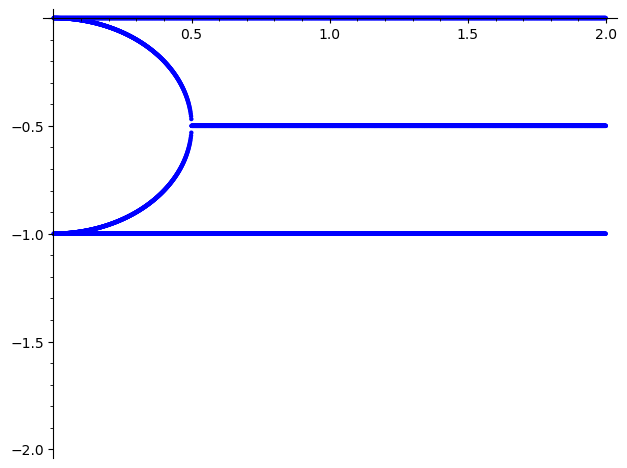

In [337]:
# Re_R = oo; (Re_R=1e3; Gamma_w=0)
G.show(ymin=-2)

In [104]:
a,b=var('a,b')    
M = lambda a,b : matrix([[a,a], [b,b]])
A = M(a,b)
show(A)
B = M(a=0,b=b)
show(B)

[a a]
[b b]

[0 0]
[b b]

In [106]:
a,b=var('a,b')    
M = lambda a,b : [a,a,b]
A = M(a,b)
show(A)
B = M(a=0,b=b)
show(B)

[a, a, b]

[0, 0, b]